## Read data

In [4]:
import turicreate
sales = turicreate.SFrame("../Week 2/home_data.sframe/home_data.sframe")

In [5]:
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


## Create polynomial sframe

In [1]:
def polynomial_sframe(feature, degree):
    poly_sframe = turicreate.SFrame()
    poly_sframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_'+ str(power)
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return(poly_sframe)
    

In [6]:
# test function
feature = sales['sqft_living']
print(polynomial_sframe(feature, 3))

power_1,power_2,power_3
1180.0,1392400.0,1643032000.0
2570.0,6604900.0,16974593000.0
770.0,592900.0,456533000.0
1960.0,3841600.0,7529536000.0
1680.0,2822400.0,4741632000.0
5420.0,29376400.0,159220088000.0
1715.0,2941225.0,5044200875.0
1060.0,1123600.0,1191016000.0
1780.0,3168400.0,5639752000.0
1890.0,3572100.0,6751269000.0


## Fit model with different orders of polynomial

In [8]:
sales = sales.sort(['sqft_living', 'price'])

In [13]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price']=sales['price']

In [14]:
model1 = turicreate.linear_regression.create(poly1_data, target='price',
                                            features = ['power_1'], validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.015752     | 4362074.696077     | 261440.790724                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

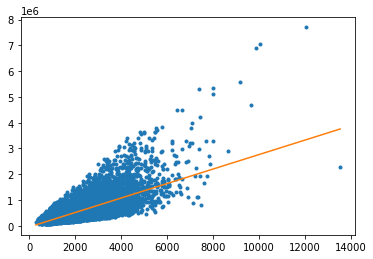

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], model1.predict(poly1_data),'-')

In [21]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']

In [22]:
model2 = turicreate.linear_regression.create(poly2_data, target = 'price',
                                            features = ['power_1', 'power_2'],
                                            validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.011789     | 5913020.984255     | 250948.368758                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

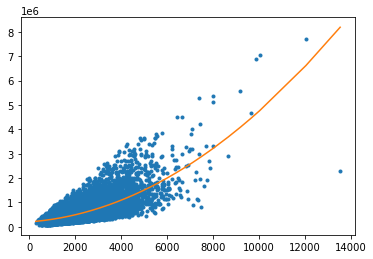

In [25]:
plt.plot(poly2_data['power_1'], poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data))

In [23]:
poly3_data = polynomial_sframe(sales['sqft_living'],3)
poly3_data['price']=sales['price']

In [26]:
model3 = turicreate.linear_regression.create(poly3_data, target='price',
                                            features=['power_1', 'power_2', 'power_3'],
                                             validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.015479     | 3261066.736007     | 249261.286346                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

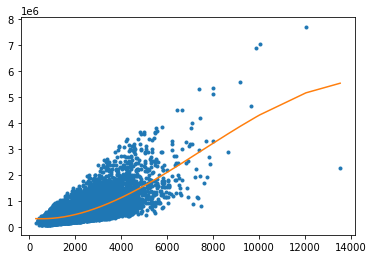

In [27]:
plt.plot(poly3_data['power_1'], poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data),'-')

In [38]:
poly15_data = polynomial_sframe(sales['sqft_living'],15)
poly15_data['price']=sales['price']

In [42]:
feature15 = ['power_1','power_2','power_3','power_4','power_5',
             'power_6','power_7','power_8','power_9','power_10',
             'power_11','power_12','power_13','power_14','power_15']
model15 = turicreate.linear_regression.create(poly15_data, target='price',
                                            features=feature15,
                                             validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.043015     | 2662308.584339     | 245690.511190                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

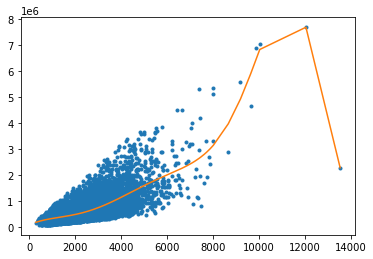

In [43]:
plt.plot(poly15_data['power_1'], poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')

In [37]:
set1, set2 = sales.random_split(0.5, seed=0)
set_1, set_2 = set1.random_split(0.5, seed=0)
set_3, set_4 = set2.random_split(0.5, seed=0)

In [45]:
poly15_1 = polynomial_sframe(set_1['sqft_living'],15)
poly15_1['price']=set_1['price']

In [46]:
model15_1 = turicreate.linear_regression.create(poly15_1, target='price',
                                               features=feature15,
                                               validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.016700     | 2195218.932304     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

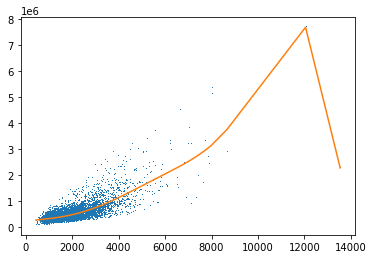

In [47]:
plt.plot(poly15_1['power_1'], poly15_1['price'],',',
        poly15_1['power_1'], model15_1.predict(poly15_1), '-')

In [48]:
model15_1.coefficients

name,index,value,stderr
(intercept),None,223312.75025024067,830108.9460532968
power_1,None,118.08612758501867,3476.5003169541187
power_2,None,-0.04734820113328519,5.899909585600052
power_3,None,3.2531034246807556e-05,0.00528964531842982
power_4,None,-3.323721525696068e-09,2.7137081037783735e-06
power_5,None,-9.758304575431146e-14,7.850089643626329e-10
power_6,None,1.154403034071346e-17,1.1639977877832447e-13
power_7,None,1.0514586941061925e-21,2.874483168861535e-17
power_8,None,3.4604961638093926e-26,8.381898206315824e-21
power_9,None,-1.0965445390702074e-30,1.1755355288807577e-24


In [49]:
poly15_2 = polynomial_sframe(set_2['sqft_living'],15)
poly15_2['price']=set_2['price']


In [50]:
model15_2 = turicreate.linear_regression.create(poly15_2, target='price',
                                               features=feature15,
                                               validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.016900     | 2069212.978547     | 234840.067186                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

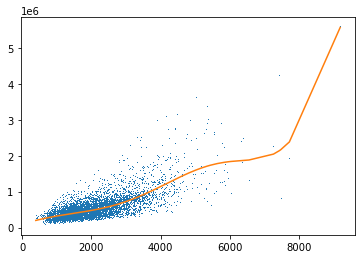

In [51]:
plt.plot(poly15_2['power_1'], poly15_2['price'],',',
        poly15_2['power_1'], model15_2.predict(poly15_2), '-')

In [52]:
poly15_3 = polynomial_sframe(set_3['sqft_living'],15)
poly15_3['price']=set_3['price']

In [53]:
model15_3 = turicreate.linear_regression.create(poly15_3, target='price',
                                               features=feature15,
                                               validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.016879     | 2269769.506521     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

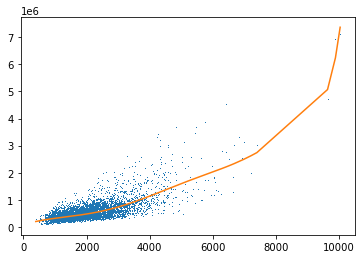

In [54]:
plt.plot(poly15_3['power_1'], poly15_3['price'],',',
        poly15_3['power_1'], model15_3.predict(poly15_3), '-')

In [55]:
poly15_4 = polynomial_sframe(set_4['sqft_living'],15)
poly15_4['price']=set_4['price']

In [56]:
model15_4 = turicreate.linear_regression.create(poly15_4, target='price',
                                               features=feature15,
                                               validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.018784     | 2314893.173832     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

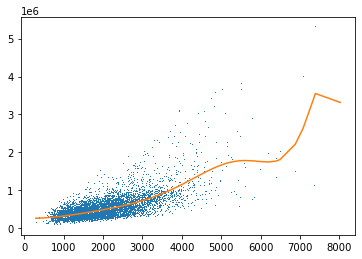

In [57]:
plt.plot(poly15_4['power_1'], poly15_4['price'],',',
        poly15_4['power_1'], model15_4.predict(poly15_4), '-')

In [63]:
print(model15_1.coefficients[14]['value'],model15_2.coefficients[14]['value'],
      model15_3.coefficients[14]['value'],
     model15_4.coefficients[14]['value'])

2.4478269312258753e-51 -9.120060244244651e-49 4.694303588595268e-50 4.780155653637646e-48


## Cross validation to find the best model

In [67]:
training_and_validation, testing = sales.random_split(0.9, seed=1)
training, validation = training_and_validation.random_split(0.5, seed=1)

In [113]:
import numpy as np
RSS = np.ones(16)
for degree in range(1,15+1):
    poly_degree = polynomial_sframe(training['sqft_living'], degree)
    my_features = poly_degree.column_names()
    poly_degree['price'] = training['price']
    validation_degree = polynomial_sframe(validation['sqft_living'], degree)
    validation_degree['price'] = validation['price']
    models_degree = turicreate.linear_regression.create(poly_degree, target='price',
                                                      features = my_features,
                                                      validation_set = validation_degree,
                                                      verbose = False)
    RSS[degree] = sum((validation_degree['price']-models_degree.predict(validation_degree))**2)

In [109]:
degree = np.arange(1,16)
min(RSS[1:16])

589182477809780.0

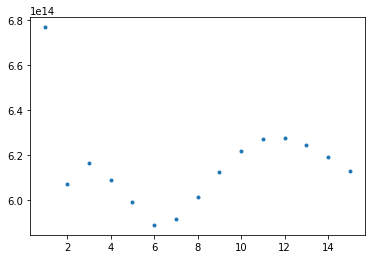

In [107]:
plt.plot(degree, RSS[1:16], '.')

## From the plot, we can see degree=6 has lowest RSS
## Using test data to assess this model

In [121]:
poly_6 = polynomial_sframe(training['sqft_living'], 6)
my_features = poly_6.column_names()
poly_6['price'] = training['price']
test_6 = polynomial_sframe(testing['sqft_living'], 6)
test_6['price'] = testing['price']
models_6 = turicreate.linear_regression.create(poly_6, target='price',features = my_features,
                                               validation_set=None)
RSS_test = sum((test_6['price']-models_6.predict(test_6))**2)


Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.014192     | 2344070.143279     | 247280.891725                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

125529337848169.81